(numpy)=
# Introducción a Numpy

Numpy es quizás el paquete de **computación numérica** más importante de Python. Se desarrolló como un paquete completo de álgebra lineal de código abierto para Python que podía rivalizar con MATLAB y similares. Es una biblioteca de Python con una larga historia y mucha funcionalidad, ya sea directamente en ella o construida a su alrededor (ver [SciPy](https://scipy.org/) y diferentes scikits). Es la base de otros paquetes del ecosistema de ciencia de datos 
- Extraer, transformar y cargar datos: [Pandas](https://pandas.pydata.org/), [Dask](https://www.dask.org/), [OpenCV](https://opencv.org/)
- Visualización de datos: [Matplotlib](https://matplotlib.org/), [Seaborn](https://seaborn.pydata.org/).
- Modelos y evalución: [Scikit-learn](https://scikit-learn.org/stable/), [statsmodels](https://www.statsmodels.org/stable/index.html), [spaCy](https://spacy.io/)
- Repote: Dash, [Stramlit](https://streamlit.io/)

La clave es que implementa arrays (matrices) multidimensionales de manera muy eficiente, con numerosas funcionalidades optimizadas sobre dicha estructura de datos. 

> Es muy común en la comunidad python usar el alias `np` cundo importamos Numpy:

In [2]:
import numpy as np

Aunque en principio las listas de python podrían servir para representar array de varias dimensiones, la eficiencia de numpy es mucho mejor, al estar construido sobre una biblioteca de rutinas en lenguaje C. Además muchas de las operaciones numpy que actúan sobre todo el array, están optimizadas y permiten evitar los bucles `for`de python, que actúan más lentamente.

Lo que sigue es un ejemplo de un array de numpy unidimensional con un millón de componentes, y el análogo como lista python. 

In [ ]:
arr1 = np.arange(1000000)
list1 = list(range(1000000))

Vamos a obtener el array resultante de multiplicar por 2 cada componente, y veamos el tiempo de CPU que se emplea. Nótese que en el caso de numpy, dicha operación se especifica simplemente como "multiplicar por 2" el array. En el caso de las listas, tenemos que usar un bucle `for` para la misma operación. Obsérvese la gran diferencia en el tiempo de ejecución:  

In [ ]:
%time for _ in range(10): arr2 = arr1 * 2
%time for _ in range(10): list2 = [x * 2 for x in list1]

CPU times: user 21.2 ms, sys: 12.1 ms, total: 33.3 ms
Wall time: 32.6 ms
CPU times: user 385 ms, sys: 84.1 ms, total: 469 ms
Wall time: 468 ms


Comparamos en la siguiente gráfico el tiempo que tardamos en sumar los `n` primeros números usando listas de Python o arrays de numpy.

In [13]:
import time
import matplotlib.pyplot as plt

def get_ex_time(f, tries=10):
    def wrapper(*args, **kwargs):
        ex_times = []
        for _ in range(tries):
            start = time.time()
            f(*args, **kwargs)
            end = time.time()
            ex_time = end - start 
            ex_times.append(ex_time)
        mean_ex_time = np.mean(ex_times)
        return mean_ex_time
    return wrapper

@get_ex_time
def get_duplicate_time_python(i):
    return list(2*x for x in range(i))

@get_ex_time
def get_duplicate_time_numpy(i):
    return 2*np.arange(i)

@get_ex_time
def get_sum_time_python(i):
    return sum(range(i))

@get_ex_time
def get_sum_time_numpy(i):
    return np.sum(np.arange(i))

n = [10**i for i in range(9)]
t_duplicate_python= [get_duplicate_time_python(i) for i in n]
t_duplicate_numpy = [get_duplicate_time_numpy(i) for i in n]
t_sum_python= [get_sum_time_python(i) for i in n]
t_sum_numpy = [get_sum_time_numpy(i) for i in n]

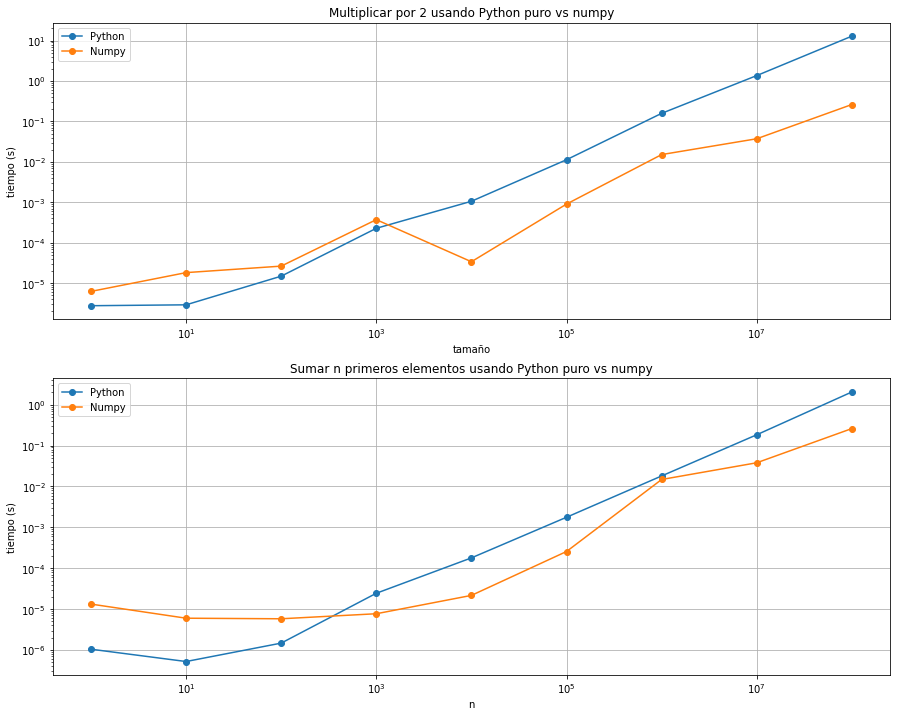

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(15, 12))
ax[0].plot(n, t_duplicate_python, "o-", label="Python")
ax[0].plot(n, t_duplicate_numpy, "o-", label="Numpy")
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_xlabel("tamaño")
ax[0].set_ylabel("tiempo (s)")
ax[0].set_title("Multiplicar por 2 usando Python puro vs numpy")
ax[0].grid(True)
ax[0].legend()
ax[1].plot(n, t_sum_python, "o-", label="Python")
ax[1].plot(n, t_sum_numpy, "o-", label="Numpy")
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_xlabel("n")
ax[1].set_ylabel("tiempo (s)")
ax[1].set_title("Sumar n primeros elementos usando Python puro vs numpy")
ax[1].grid(True)
ax[1].legend()
fig.show()

## Arrays de Numpy

La estructura de datos principal de Numpy es el **array n-dimensional**. Como hemos dicho, Numpy nos permite operar sobre los arrays en su totalidad,  especificando las operaciones como si lo hiciéramos con las componentes individuales. 

Hay muchas formas de crear arrays, pero vamos a empezar creando un array de números psuedoaletorios obtenidos como muestras de una distribución normal de media 0 y desviación típica 1 para empezar a explorar los atributos y posibles operaciones.

In [15]:
data = np.random.randn(2, 3)
data

array([[-1.92636183, -2.55089466, -0.88577683],
       [-0.13163882,  0.52617196,  0.77661784]])

Podemos por ejemplo obtener el array resultante de multiplicar cada componente del array por 10, sin necesidad de hacerlo elemento a elemento

In [16]:
data * 10

array([[-19.26361831, -25.50894661,  -8.85776834],
       [ -1.3163882 ,   5.26171964,   7.76617837]])

O la suma de cada componente consigo mismo:

In [17]:
data + data

array([[-3.85272366, -5.10178932, -1.77155367],
       [-0.26327764,  1.05234393,  1.55323567]])

Nótese que las operaciones anteriores **no cambian el array sobre el que operan**:

In [18]:
data

array([[-1.92636183, -2.55089466, -0.88577683],
       [-0.13163882,  0.52617196,  0.77661784]])

Los arrays de numpy deben ser **homogéneos**, es decir todas sus componentes del mismo tipo. Numpy incorpora una [una variedad extensa de tipos](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.byte), pero los más usuales son los de tipo `float`, `int` y `bool`.

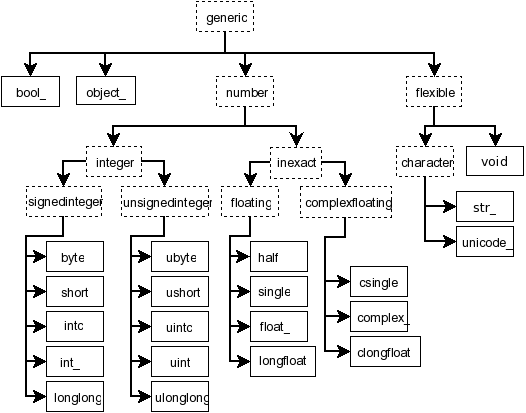

In [ ]:
data.dtype

dtype('float64')

El método `ndim` nos da el número de dimensiones, y el método `shape` nos da el tamaño de cada dimensión, en forma de tupla. 

En este caso, tenemos que `data` es un array bidimensional, con 2 "filas" y 3 "columnas":

In [ ]:
print(data.ndim)
print(data.shape)


2
(2, 3)


En la terminología de numpy, cada una de las dimensiones se denominan "ejes" (*axis*), y se numeran consecutivamente desde 0. Por ejemplo, en un array bidimensional, el eje 0 (*axis=0*) corresponde a las filas y el eje 1 corresponde a las columnas (*axis=1*). 

### Creación de arrays

La manera más fácil de crear arrays es mediante el método `np.array`. Basta con aplicarlo a cualquier objeto de tipo secuencial que sea susceptible de transformarse en un array. Por ejemplo, una lista de números se transforma en un array unidimensional: 

In [25]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

Si le pasamos listas anidadas con una estructura correcta, podemos obtener el correspondiente array bidimensional: 

In [26]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

Hay otras maneras de crear arrays. Damos a continuación solo algunos ejemplos:

In [27]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
np.ones((3, 6))

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [29]:
np.arange(20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [30]:
np.eye(7)

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [33]:
np.diag(range(5))

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 4]])

In [ ]:
np.

Podemos usar también `reshape` para transformar entre distintas dimensiones. Por ejemplo, un uso típico es crear un array bidimensional a partir de uno unidimensional:

In [31]:
L=np.arange(12)
M=L.reshape(3,4)
L,M

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]))

Hasta ahora sólo hemos visto ejemplos de arrays unidimensionales y bidimensionales. Estas son las dimensiones más frecuentes, pero numpy soporta arrays con cualquier número finito de dimensiones. Por ejemplo, aquí vemos un array de tres dimensiones:

In [32]:
np.zeros((2, 3, 2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

### Tipos de datos en las componentes de un array (*dtype*)

El tipo de dato de las componentes de un array está implícito cuando se crea, pero podemos especificarlo: 

In [ ]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
print(arr1.dtype)
print(arr2.dtype)

float64
int32


Podemos incluso convertir el `dtype` de un array que ya se ha creado, usando el método `astype`. En el ejemplo que sigue, a partir de un array de enteros, obtenemos uno de números de coma flotante:

In [ ]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int64')

In [ ]:
float_arr = arr.astype(np.float64)
float_arr.dtype
float_arr

array([1., 2., 3., 4., 5.])

Podemos incluso pasar de coma flotante a enteros, en cuyo caso se trunca la parte decimal:

In [ ]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

O pasar de strings a punto flotante, siempre que los strings del array tengan sentido como números:

In [ ]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

### Operaciones aritméticas con arrays

Una de las características más interesantes de numpy es la posibilidad de aplicar eficientes operaciones aritméticas "componente a componente" entre arrays, sin necesidad de usar bucles `for`. Basta con usar la correspondiente operación numérica de python. 

Veamos algunos ejemplos:

In [ ]:
A = np.array([[1., 2., 3.], [4., 5., 6.]])
B = np.array([[8.1, -22, 12.3], [6.1, 7.8, 9.2]])

In [ ]:
A * B

array([[  8.1, -44. ,  36.9],
       [ 24.4,  39. ,  55.2]])

In [ ]:
A - B

array([[-7.1, 24. , -9.3],
       [-2.1, -2.8, -3.2]])

En principio, para poder aplicar estas operaciones entre arrays, se deben aplicar sobre arrays con las mismas dimensiones (el mismo `shape`). Es posible operar entre arrays de distintas dimensiones, con el mecanismo de *broadcasting*, pero es ésta una característica avanzada de numpy que no veremos aquí.  

Podemos efectuar operaciones entre arrays y números (*escalares*), indicando con ello que la operación con el escalar se aplica a cada uno de los componentes del array. Vemos algunos ejemplos: 

In [ ]:
3+B

array([[ 11.1, -19. ,  15.3],
       [  9.1,  10.8,  12.2]])

In [ ]:
1 / A

array([[1.    , 0.5   , 0.3333],
       [0.25  , 0.2   , 0.1667]])

In [ ]:
A ** 0.5

array([[1.    , 1.4142, 1.7321],
       [2.    , 2.2361, 2.4495]])

Igualmente, podemos efectuar comparaciones aritméticas entre dos arrays, obteniendo el correspondiente array de booleanos como resultado:

In [ ]:
A > B-5

array([[False,  True, False],
       [ True,  True,  True]])

En todos los casos anteriores, nótese que estas operaciones no modifican los arrays sobre los que se aplican, sino que obtienen un nuevo array con el correspondiente resultado.

### Indexado y *slicing* (operaciones básicas) 

Otra de las características más interesantes de numpy es la gran flexibilidad para acceder a las componentes de un array, o a un subconjunto del mismo. Vamos a ver a continuación algunos ejemplos básicos.

**Arrays unidimensonales**

Para arrays unidimensionales, el acceso es muy parecido al de listas. Por ejemplo, acceso a las componentes:

In [ ]:
C = np.arange(10)*2
C

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [ ]:
C[5]

10

La operación de *slicing* en arrays es similar a la de listas. Por ejemplo:

In [ ]:
C[5:8]

array([10, 12, 14])

Sin embargo, hay una diferencia fundamental: en general en python, el slicing siempre crea *una copia* de la secuencia original. En numpy, el *slicing* es una *vista* de array original. Esto tiene como consecuencia que las modificaciones que se realicen sobre dicha vista se están realizando sobre el array original. Por ejemplo:   

In [ ]:
C[5:8] = 12
C

array([ 0,  2,  4,  6,  8, 12, 12, 12, 16, 18])

Y además hay que tener en cuenta que cualquier referencia a una vista es en realidad una referencia a los datos originales, y que las modificaciones que se realicen a través de esa referencia, se realizarán igualmente sobre el original.

Veámos esto con el siguiente ejemplo:

In [ ]:
# C_slice referencia a las componenentes 5, 6 y 7 del array C.
C_slice = C[5:8]
C_slice

array([12, 12, 12])

Modificamos la componente 1 de `C_slice`:

In [ ]:
C_slice[1] = 12345
C_slice

array([   12, 12345,    12])

Pero la componente 1 de `C_slice` es en realidad la componente 6 de `C`, así que `C` ha cambiado:

In [ ]:
C

array([    0,     2,     4,     6,     8,    12, 12345,    12,    16,
          18])

Podemos incluso cambiar toda la subsecuencia, cambiando así es parte del array original:

In [ ]:
C_slice[:] = 64
C

array([ 0,  2,  4,  6,  8, 64, 64, 64, 16, 18])

Nótese la diferencia con las listas de python, en las que `l[:]` es la manera estándar de crear una *copia* de una lista `l`. En el caso de *numpy*, si se quiere realizar una copia, se ha de usar el método `copy` (por ejemplo, `C.copy()`).

**Arrays de más dimensiones**

El acceso a los componentes de arrays de dos o más dimensiones es similar, aunque la casuística es más variada.

Cuando accedemos con un único índice, estamos accediendo al correspondiente subarray de esa posición. Por ejemplo, en array de dos dimensiones, con 3 filas y 3 columnas, la posición 2 es la tercera fila:

In [ ]:
C2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
C2d[2]

array([7, 8, 9])

De esta manera, recursivamente, podríamos acceder a los componentes individuales de una array de cualquier dimensión. En el ejemplo anterior, el elemento de la primera fila y la tercera columna sería:

In [ ]:
C2d[0][2]

3

Normalmente no se suele usar la notación anterior para acceder a los elementos individuales, sino que se usa un único corchete con los índices separados por comas: Lo siguiente es equivalente:

In [ ]:
C2d[0, 2]

3

Veamos más ejemplos de acceso y modificación en arrays multidimensionales, en este caso con tres dimensiones.

In [ ]:
C3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

Accediendo a la posición 0 obtenemos el correspondiente subarray de dos dimensiones:

In [ ]:
C3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

Vamos a guardar una copia de de ese subarray y lo modificamos en el original con el número `42` en todas las posiciones:

In [ ]:
old_values = C3d[0].copy()
C3d[0] = 42
C3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

Y ahora reestablecemos los valores originales:

In [ ]:
C3d[0] = old_values
C3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

Como antes, podemos en este array de tres adimensiones acceder a una de sus componentes, especificando los tres índices: 

In [ ]:
C3d[1,0,2]

9

Si sólo especificamos dos de los tres índices, accedemos al correspondiente subarray unidimensional:

In [ ]:
C3d[1, 0]

array([7, 8, 9])

#### Indexado usando *slices*

In [ ]:
C2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Los *slicings* en arrays multidimensionales se hacen a lo largo de los correspondientes ejes. Por ejemplo, en un array bidimensional, lo haríamos sobre la secuencia de filas. 

In [ ]:
C2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

Pero también podríamos hacerlo en ambos ejes. Por ejemplo para obtener el subarray hasta la segunda fila y a partir de la primera columna:

In [ ]:
C2d[:2, 1:]

array([[2, 3],
       [5, 6]])

Si en alguno de los ejes se usa un índice individual, entonces se pierde una de las dimensiones:

In [ ]:
C2d[1, :2]

array([4, 5])

Nótese la diferencia con la operación `C2d[1:2,:2]`. Puede parecer que el resultado ha de ser el mismo, pero si se usa slicing en ambos ejes se mantiene el número de dimensiones:

In [ ]:
C2d[1:2,:2]

array([[4, 5]])

Más ejemplos:

In [ ]:
C2d[:2, 2]

array([3, 6])

In [ ]:
C2d[:, :1]

array([[1],
       [4],
       [7]])

Como hemos visto más arriba, podemos usar *slicing* para asignar valores a las componentes de un array. Por ejemplo

In [ ]:
C2d[:2, 1:] = 0
C2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### Indexado con booleanos

Los arrays de booleanos se pueden usar en numpy como una forma de indexado para seleccionar determinadas componenetes en una serie de ejes. 

Veamos el siguiente ejemplo:

In [ ]:
nombres = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [ ]:
data = np.random.randn(7, 4)
data

array([[ 0.0929,  0.2817,  0.769 ,  1.2464],
       [ 1.0072, -1.2962,  0.275 ,  0.2289],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 1.669 , -0.4386, -0.5397,  0.477 ],
       [ 3.2489, -1.0212, -0.5771,  0.1241],
       [ 0.3026,  0.5238,  0.0009,  1.3438],
       [-0.7135, -0.8312, -2.3702, -1.8608]])

Podríamos interpretar que cada fila del array `data` son datos asociados a las correspondientes personas del array `nombres`. Si ahora queremos quedarnos por ejemplos con las filas correspondientes a Bob, podemos usar indexado booleano de la siguiente manera:

El array de booleanos que vamos a usar será:

In [ ]:
nombres == 'Bob'

array([ True, False, False,  True, False, False, False])

Y el indexado con ese array, en el eje de las filas, nos dará el subarray de las filas correspondientes a Bob:

In [ ]:
data[nombres == 'Bob']

array([[ 0.0929,  0.2817,  0.769 ,  1.2464],
       [ 1.669 , -0.4386, -0.5397,  0.477 ]])

Podemos mezclar indexado booleano con índices concretos o con slicing en distintos ejes:

In [ ]:
data[nombres == 'Bob', 2:]

array([[ 0.769 ,  1.2464],
       [-0.5397,  0.477 ]])

In [ ]:
data[nombres == 'Bob', 3]

array([1.2464, 0.477 ])

Para usar el indexado complementario (en el ejemplo, las filas correspondientes a las personas que no son Bob), podríamos usar el array de booleanos `nombres != 'Bob'`. Sin embargo, es más habitual usar el operador `~`:

In [ ]:
data[~(nombres == 'Bob')]

array([[ 1.0072, -1.2962,  0.275 ,  0.2289],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 3.2489, -1.0212, -0.5771,  0.1241],
       [ 0.3026,  0.5238,  0.0009,  1.3438],
       [-0.7135, -0.8312, -2.3702, -1.8608]])

Incluso podemos jugar con otros operadores booleanos como `&` (and) y `|` (or), para construir indexados booleanos que combinan condiciones. 

Por ejemplo, para obtener las filas correspondiente a Bob o a Will:

In [ ]:
mask = (nombres == 'Bob') | (nombres == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [ ]:
data[mask]

array([[ 0.0929,  0.2817,  0.769 ,  1.2464],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 1.669 , -0.4386, -0.5397,  0.477 ],
       [ 3.2489, -1.0212, -0.5771,  0.1241]])

Y como en los anteriores indexados, podemos usar el indexado booleano para modificar componentes de los arrays. Lo siguiente pone a 0 todos los componentes neativos de `data`:

In [ ]:
data<0

array([[False, False, False, False],
       [False,  True, False, False],
       [False, False,  True,  True],
       [False,  True,  True, False],
       [False,  True,  True, False],
       [False, False, False, False],
       [ True,  True,  True,  True]])

In [ ]:
data[data < 0] = 0
data

array([[0.0929, 0.2817, 0.769 , 1.2464],
       [1.0072, 0.    , 0.275 , 0.2289],
       [1.3529, 0.8864, 0.    , 0.    ],
       [1.669 , 0.    , 0.    , 0.477 ],
       [3.2489, 0.    , 0.    , 0.1241],
       [0.3026, 0.5238, 0.0009, 1.3438],
       [0.    , 0.    , 0.    , 0.    ]])

Obsérvese que ahora `data<0` es un array de booleanos bidimensional con la misma estructura que el propio `data` y que por tanto tanto estamos haciendo indexado booleano sobre ambos ejes. 

Podríamos incluso fijar un valor a filas completas, usando indexado por un booleano unidimensional:

In [ ]:
data[~(nombres == 'Joe')] = 7
data

array([[7.    , 7.    , 7.    , 7.    ],
       [1.0072, 0.    , 0.275 , 0.2289],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [0.3026, 0.5238, 0.0009, 1.3438],
       [0.    , 0.    , 0.    , 0.    ]])

### *Fancy Indexing*

El término *fancy indexing* se usa en numpy para indexado usando arrays de enteros. Veamos un ejemplo:

In [ ]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

Indexando con `[4,3,0,6]` nos permite obtener las filas indicadas en el orden dado:

In [ ]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

Si usamos más de un array para hacer *fancy indexing*, entonces toma los componentes descritos por la tupla de índices correspondiente al `zip` de los arrays de índices. Veámoslos con el siguiente ejemplo:

In [ ]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [ ]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

Se han obtenido los elementos de índices `(1,0)`, `(5,3)`, `(7,1)` y `(2,2)`: 

Quizás en este último caso, lo "natural" sería que nos hubiera devuelto el subarray formado por las filas 1, 5, 7 y 2 (en ese orden), y de ahí solo las columnas 0, 3 , 1 y 2 (en ese orden. 

Para obtener eso debemos hacer la siguiente operación:

In [ ]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

Dos observaciones importantes sobre el *fancy indexing*:

* Siempre devuelve arrays unidimensionales.
* A diferencia del *slicing*, siempre construye una copia del array sobre el que se aplica (nunca una *vista*). 

### Trasposición de arrays y producto matricial

El método `T` obtiene el array traspuesto de uno dado:

In [ ]:
D = np.arange(15).reshape((3, 5))
D

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
D.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [ ]:
D

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

En el cálculo matricial será de mucha utilidad el método `np.dot` de numpy, que sirve tanto para calcular el producto escalar como el producto matricial. Veamos varios usos: 

In [ ]:
E = np.random.randn(6, 3)
E

array([[-0.8608,  0.5601, -1.2659],
       [ 0.1198, -1.0635,  0.3329],
       [-2.3594, -0.1995, -1.542 ],
       [-0.9707, -1.307 ,  0.2863],
       [ 0.378 , -0.7539,  0.3313],
       [ 1.3497,  0.0699,  0.2467]])

Ejemplos de producto escalar:

In [ ]:
np.dot(E[:,0],E[:,1]) # producto escalar de dos columnas

0.9393581459889597

In [ ]:
np.dot(E[2],E[4]) # producto escalar de dos filas

-1.252231064146922

In [ ]:
np.dot(E.T, E[:,0]) # producto de una matriz por un vector

array([9.2291, 0.9394, 4.948 ])

In [ ]:
np.dot(E.T,E)   # producto de dos matrices

array([[ 9.2291,  0.9394,  4.948 ],
       [ 0.9394,  3.7662, -1.3622],
       [ 4.948 , -1.3622,  4.3437]])

In [ ]:
np.dot(E,E.T)   # producto de dos matrices

array([[ 2.6573, -1.1203,  3.8712, -0.2591, -1.167 , -1.4349],
       [-1.1203,  1.2562, -0.5838,  1.369 ,  0.9573,  0.1695],
       [ 3.8712, -0.5838,  7.9844,  2.1096, -1.2522, -3.5789],
       [-0.2591,  1.369 ,  2.1096,  2.7327,  0.7133, -1.3309],
       [-1.167 ,  0.9573, -1.2522,  0.7133,  0.821 ,  0.5392],
       [-1.4349,  0.1695, -3.5789, -1.3309,  0.5392,  1.8875]])

In [ ]:
np.dot(E.T, E[:,:1]) # producto de dos matrices

array([[9.2291],
       [0.9394],
       [4.948 ]])

## Funciones universales sobre arrays (componente a componente)

En este contexto, una función universal (o *ufunc*) es una función que actúa sobre cada componente de un array o arrays de numpy. Estas funciones son muy eficientes y se denominan *vectorizadas*. Por ejemplo:   

In [ ]:
M = np.arange(10)
M

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.sqrt(M) # raiz cuadrada de cada componente

array([0.    , 1.    , 1.4142, 1.7321, 2.    , 2.2361, 2.4495, 2.6458,
       2.8284, 3.    ])

In [ ]:
np.exp(M.reshape(2,5)) # exponencial de cad componente

array([[   1.    ,    2.7183,    7.3891,   20.0855,   54.5982],
       [ 148.4132,  403.4288, 1096.6332, 2980.958 , 8103.0839]])

Existen funciones universales que actúan sobre dos arrays, ya que realizan operaciones binarias:

In [ ]:
x = np.random.randn(8)
y = np.random.randn(8)
x,y

(array([-0.0119,  1.0048,  1.3272, -0.9193, -1.5491,  0.0222,  0.7584,
        -0.6605]),
 array([ 0.8626, -0.01  ,  0.05  ,  0.6702,  0.853 , -0.9559, -0.0235,
        -2.3042]))

In [ ]:
np.maximum(x, y)

array([ 0.8626,  1.0048,  1.3272,  0.6702,  0.853 ,  0.0222,  0.7584,
       -0.6605])

Existe una numerosa colección de *ufuncs* tanto unarias como bianrias. Se recomienda consultar el manual. 

### Expresiones condicionales vectorizadas con *where*

Veamos cómo podemos usar un versión vectorizada de la función `if`. 

Veámoslo con un ejemplo. Supongamos que tenemos dos arrays (unidimensionales) numéricos y otro array booleano del mismo tamaño: 

In [ ]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

Si quisiéramos obtener el array que en cada componente tiene el valor de `xs` si el correspondiente en `cond` es `True`, o el valor de `ys` si el correspondiente en `cond` es `False`, podemos hacer lo siguiente:  

In [ ]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

Sin embargo, esto tiene dos problemas: no es lo suficientemente eficiente, y además no se traslada bien a arrays multidimensionales. Afortunadamente, tenemos `np.where` para hacer esto de manera conveniente:

In [ ]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

No necesariamente el segundo y el tercer argumento tiene que ser arrays. Por ejemplo:

In [ ]:
F = np.random.randn(4, 4)

F,np.where(F > 0, 2, -2)

(array([[-0.6525, -1.2183, -1.3326,  1.0746],
        [ 0.7236,  0.69  ,  1.0015, -0.5031],
        [-0.6223, -0.9212, -0.7262,  0.2229],
        [ 0.0513, -1.1577,  0.8167,  0.4336]]),
 array([[-2, -2, -2,  2],
        [ 2,  2,  2, -2],
        [-2, -2, -2,  2],
        [ 2, -2,  2,  2]]))

O una combinación de ambos. Por ejemplos, para modificar sólo las componentes positivas:

In [ ]:
np.where(F > 0, 2, F) 

array([[-0.6525, -1.2183, -1.3326,  2.    ],
       [ 2.    ,  2.    ,  2.    , -0.5031],
       [-0.6223, -0.9212, -0.7262,  2.    ],
       [ 2.    , -1.1577,  2.    ,  2.    ]])

### Funciones estadísticas

Algunos métodos para calcular indicadores estadísticos sobre los elementos de un array.

* `np.sum`: suma de los componentes
* `np.mean`: media aritmética
* `np.std` y `np.var`: desviación estándar y varianza, respectivamente.
* `np.max` y `np.min`: máximo y mínimo, resp.
* `np.argmin` y `np.argmax`: índices de los mínimos o máximos elementos, respectivamente.
* `np.cumsum`: sumas acumuladas de cada componente

Estos métodos también se pueden usar como atributos de los arrays. Es decir, por ejemplo `A.sum()` o `A.mean()`.

Veamos algunos ejemplos, generando en primer lugar un array con elementos generados aleatoriamente (siguiendo una distribución normal):

In [ ]:
G = np.random.randn(5, 4)
G

array([[ 1.0107,  1.8249, -0.9975,  0.8506],
       [-0.1316,  0.9124,  0.1882,  2.1695],
       [-0.1149,  2.0037,  0.0296,  0.7953],
       [ 0.1181, -0.7485,  0.585 ,  0.1527],
       [-1.5657, -0.5625, -0.0327, -0.929 ]])

In [ ]:
G.sum()

5.558182835908912

In [ ]:
G.mean()

0.2779091417954456

In [ ]:
G.cumsum() # por defecto, se aplana el array y se hace la suma acumulada

array([1.0107, 2.8356, 1.8381, 2.6887, 2.5571, 3.4695, 3.6577, 5.8272,
       5.7123, 7.716 , 7.7456, 8.5408, 8.6589, 7.9104, 8.4954, 8.6481,
       7.0824, 6.5199, 6.4872, 5.5582])

Todas estas funciones se pueden aplicar a lo largo de un eje, usando el parámetro `axis`. Por ejemplos, para calcular las medias de cada fila (es decir, recorriendo en el sentido de las columnas), aplicamos `mean` por `axis=1`:

In [ ]:
G.mean(axis=1)

array([ 0.6722,  0.7846,  0.6784,  0.0268, -0.7725])

Y la suma de cada columna (es decir, recorriendo las filas), con `sum` por `axis=0`:

In [ ]:
G.sum(axis=0)

array([-0.6833,  3.4299, -0.2274,  3.039 ])

Suma acumulada de cada columna:

In [ ]:
G.cumsum(axis=0)

array([[ 1.0107,  1.8249, -0.9975,  0.8506],
       [ 0.8792,  2.7373, -0.8093,  3.0201],
       [ 0.7642,  4.741 , -0.7797,  3.8153],
       [ 0.8823,  3.9925, -0.1947,  3.968 ],
       [-0.6833,  3.4299, -0.2274,  3.039 ]])

Dentro de cada columna, el número de fila donde se alcanza el mínimo se puede hacer asi:

In [ ]:
G,G.argmin(axis=0)

(array([[ 1.0107,  1.8249, -0.9975,  0.8506],
        [-0.1316,  0.9124,  0.1882,  2.1695],
        [-0.1149,  2.0037,  0.0296,  0.7953],
        [ 0.1181, -0.7485,  0.585 ,  0.1527],
        [-1.5657, -0.5625, -0.0327, -0.929 ]]),
 array([4, 3, 0, 4]))

### Métodos para arrays booleanos

In [ ]:
H = np.random.randn(50)
H

array([-0.4826, -0.0363,  1.0954,  0.9809, -0.5895,  1.5817, -0.5287,
        0.457 ,  0.93  , -1.5693, -1.0225, -0.4028,  0.2205, -0.1934,
        0.6692, -1.649 , -2.2528, -1.1668,  0.3536,  0.7021, -0.2746,
       -0.1391,  0.1077, -0.6065, -0.4171, -0.017 , -1.2241, -1.8008,
        1.6347,  0.989 ,  0.4579,  0.5552,  1.3067, -0.4406, -0.3014,
        0.4988, -0.824 ,  1.3206,  0.508 , -0.6534,  0.187 , -0.3917,
       -0.2723, -0.0171,  0.6803,  0.6355, -0.7572,  0.7181, -0.3043,
       -1.6778])

Es bastante frecuente usar `sum` para ontar el número de veces que se cumple una condición en un array, aprovechando que `True` se identifica con 1 y `False` con 0:

In [ ]:
(H > 0).sum() # Number of positive values

22

Las funciones python `any` y `all` tienen también su correspondiente versión vectorizada. `any` se puede ver como un *or* generalizado, y `all`como un *and* generalizado:  

In [ ]:
bools = np.array([False, False, True, False])
bools.any(),bools.all()

(True, False)

Podemos comprobar si se cumple *alguna vez* una condición entre los componentes de un array, o bien si se cumple *siempre* una condición:

In [ ]:
np.any(H>0)

True

In [ ]:
np.all(H< 10)

True

In [ ]:
np.any(H > 15)

False

In [ ]:
np.all(H >0)

False

## Entrada y salida de arrays en ficheros

Existen una serie de utilidades para guardar el contenido de un array en un fichero y recuperarlo más tarde. 

Las funciones `save` y `load` hacen esto. Los arrays se almacenan en archivos con extensión *npy*.  

In [ ]:
J = np.arange(10)
np.save('un_array', J)

In [ ]:
np.load('un_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Con `savez`, podemos guardar una serie de arrays en un archivo de extensión *npz*, asociados a una serie de claves. Por ejemplo:

In [ ]:
np.savez('array_archivo.npz', a=J, b=J**2)

Cuando hacemos `load` sobre un archivo *npz*, cargamos un objeto de tipo diccionario, con el que podemos acceder (de manera perezosa) a los distintos arrays que se han almacenado:

In [ ]:
arch = np.load('array_archivo.npz')
arch['b']

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [ ]:
arch['a']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

En caso de que fuera necesario, podríamos incluso guardar incluso los datos en formato comprimido con `savez_compressed`:

In [ ]:
np.savez_compressed('arrays_comprimidos.npz', a=arr, b=arr)

In [ ]:
!rm un_array.npy
!rm array_archivo.npz
!rm arrays_comprimidos.npz